In [18]:
import pandas as pd


import the buoy list
from data/buoy_list.csv

In [25]:
buoy_list = pd.read_csv('../data/buoys.csv')
# get the list of buoys
buoy_list.columns
# buoy_list = buoy_list['buoy_id'].tolist()
# buoy_list.head()
# drop Unnamed: 1 column
buoy_list = buoy_list.drop(columns=['Unnamed: 1'])
# get the list of buoys
# define the column names
buoy_list.columns = ['buoy_id']
# get the list of buoys
buoy_list = buoy_list['buoy_id'].tolist()
print(buoy_list[0:10])

[42001, 46059, 41044, 46071, 42002, 46072, 46066, 41046, 46088, 44066]


In [28]:
buoy_locs = pd.read_csv("../data/buoy_id_to_lat_lon.csv")
# add header to buoy_locs
buoy_locs.columns = ['buoy', 'coords']

# merge the two dataframes
# the coords is a list of two numbers, the lat and lon
# split the coords into two columns and add them to the buoy_locs dataframe
# buoy_locs[['lat', 'lon']] = pd.DataFrame(buoy_locs.coords.tolist(), index=buoy_locs.index)
# buoy_locs = buoy_locs.drop(columns=['coords'])
# get the numbers
# buoy_locs.head()
import re
buoy_locs.head()
# for every row use regex to split the coords into two columns and add them to the buoy_locs dataframe
for index, row in buoy_locs.iterrows():
    # print(row['coords'])
    lat = re.findall(r"[-+]?\d*\.\d+|\d+", row['coords'])[0]
    lon = re.findall(r"[-+]?\d*\.\d+|\d+", row['coords'])[1]
    buoy_locs.at[index, 'lat'] = lat
    buoy_locs.at[index, 'lon'] = lon
# drop the coords column
buoy_locs = buoy_locs.drop(columns=['coords'])
# get the numbers
buoy_locs.head()

,buoy,lat,lon
0,46072,51.666,-172.114
1,46088,48.332,-123.179
2,51000,23.528,-153.792
3,42020,26.968,-96.693
4,46028,35.770,-121.903


In [29]:
# load up the optimal buoy locations from optimal_shot_times.csv
optimal_buoy_locs = pd.read_csv("../data/optimal_shot_times.csv")
# add header to optimal_buoy_locs
optimal_buoy_locs.head()
# column Time is in UTC time



,Time,Buoy ID,Time.1
0,2310,42002,11:10:10 PM
1,2210,42059,10:10:10 PM
2,2210,44007,10:10:10 PM
3,2210,44007,10:10:10 PM
4,2210,44013,10:10:10 PM


In [32]:
# Create a list of phrases for the main page to display on the ticker
phrase_partone = 'Looking at Buoy {}'.format(buoy_list[index]) # where index is a random id from the list of buoys
phrase_parttwo = 'The optimal time to shoot is {}'.format(optimal_buoy_locs['Time'][index]) # where index is a random id from the list of buoys
phrase_partthree = 'The optimal time to shoot is {}'.format(optimal_buoy_locs['Time'][index]) # where index is a random id from the list of buoys
import random
phrases = [] # create an empty list
# populate the list with 100 random phrases
for i in range(100):
    index = random.randint(0, len(buoy_list)-1)
    phrase_partone = 'Looking at Buoy {}'.format(buoy_list[index]) # where index is a random id from the list of buoys
    phrase_parttwo = 'watch {} at {}'.format(index,optimal_buoy_locs['Time'][index]) # where index is a random id from the list of buoys
    phrase_partthree = 'sunset for {} is {}'.format(index,optimal_buoy_locs['Time'][index]) # where index is a random id from the list of buoys
    # randomly choose one of the three phrases to add to the list
    phrase = random.choice([phrase_partone, phrase_parttwo, phrase_partthree])
    # replace all spaces with "+" and end all the phrases with a';'
    phrase = phrase.replace(" ", "+") + ";"
    phrases.append(phrase)


# replace all spaces with "+" and end all the phrases with a';'
# save the phrases to a file 'ticker_phrases.txt'

master_phrase = ""
for phrase in phrases:
    master_phrase += phrase


# save master_phrase to a file 'ticker_phrases.txt'
with open('../data/ticker_phrases.txt', 'w') as f:
    f.write(master_phrase)




In [ ]:
# Tapestry Weaver Function
import numpy as np


def update_tapestry(tapestry_image,new_row):
    # using cv2 to add the new row to the tapestry image
    # if the tapestry image is more than 100 rows tall, delete the top row and add the new row to the bottom
    # if the tapestry image is less than 100 rows tall, add the new row to the bottom
    # return the updated tapestry image
    
    # get the height and width of the tapestry image
    height, width, channels = tapestry_image.shape
    # if the tapestry image is more than 100 rows tall, delete the top row and add the new row to the bottom
    if height > 100:
        # delete the top row
        tapestry_image = tapestry_image[1:height, 0:width]
        # add the new row to the bottom
        tapestry_image = np.vstack((tapestry_image, new_row))
    # if the tapestry image is less than 100 rows tall, add the new row to the bottom
    else:
        tapestry_image = np.vstack((tapestry_image, new_row))
    return tapestry_image



In [57]:
# function to parse the images/buoys directory and return only the set of most recent unique images from the directory
import os
import re
import datetime
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import time
import glob
import shutil
import requests
import json
import urllib.request

# def get_newest_images():
#     # parse the images/buoys directory and return only the set of most recent unique images from the directory
#     # get the list of files in the images/buoys directory
#     files = glob.glob('../images/buoys/*')
#     # get the list of unique buoys
#     buoys = []
#     for file in files:
#         buoy = file.split('/')[-1].split('_')[0]
#         buoys.append(buoy)
#     buoys = list(set(buoys))
#     # get the most recent image for each buoy
#     newest_images = []
#     for buoy in buoys:
#         # get the list of files for this buoy
#         buoy_files = glob.glob('../images/buoys/{}*'.format(buoy))
#         # get the most recent file
#         newest_file = max(buoy_files, key=os.path.getctime)
#         newest_images.append(newest_file)
#     return newest_images

# def parse_the_newest_images(newest_images):
#     # check the newest images to see if any of the buoys are in the optimal shot times
#     # if they are, add them to the list of buoys to be added to the tapestry
#     # return the list of buoys to be added to the tapestry
    
#     # get the list of buoys from the newest images
#     buoys = []
#     for file in newest_images:
#         buoy = file.split('/')[-1].split('_')[0]
#         buoys.append(buoy)
#     # get the list of optimal buoys
#     optimal_buoys = optimal_buoy_locs['Buoy ID'].tolist()
#     # get the list of buoys to be added to the tapestry
#     buoys_to_add = []
#     for buoy in buoys:
#         if buoy in optimal_buoys:
#             buoys_to_add.append(buoy)
#     return buoys_to_add

# def parse_older_images(all_images):
#     # check the older images to see if any of the buoys are in the optimal shot times
#     # if they are, add them to the list of buoys to be added to the tapestry
#     # return the list of buoys to be added to the tapestry
    
#     # get the list of buoys from all the image files
#     buoys = []
#     for file in all_images:
#         buoy = file.split('/')[-1].split('_')[0]
#         buoys.append(buoy)
#     # get the list of optimal buoys
#     optimal_buoys = optimal_buoy_locs['Buoy ID'].tolist()
#     # get the list of buoys to be added to the tapestry
#     buoys_to_add = []
#     for buoy in buoys:
#         if buoy in optimal_buoys:
#             buoys_to_add.append(buoy)

#     print("buoys_to_add: {}".format(buoys_to_add))
#     return buoys_to_add

# def parse_any_buoy_images(all_files):
#     # just get all the images from the images/buoys directory and return one from each buoy
#     # get the list of unique buoys
#     buoys = []
#     for file in all_files:
#         buoy = file.split('/')[-1].split('_')[0]
#         buoys.append(buoy)
#     buoys = list(set(buoys))
#     # get one image from each buoy
#     buoy_images = []
#     final_images = []
#     for buoy in buoys:
#         # get the list of files for this buoy
#         buoy_files = glob.glob('../images/buoys/{}*'.format(buoy)) # this is a list of folders i.e. ['../images/buoys/44011_2019-07-01_12-00-00', '../images/buoys/44011_2019-07-01_12-00-00'] These folders contain the images
#         # get the most recent file
#         for buoy_file in buoy_files:
#             buoy_images.append(buoy_file) # this is a list of images i.e. ['../images/buoys/44011_2019-07-01_12-00-00/44011_2019-07-01_12-00-00_0.jpg', '../images/buoys/44011_2019-07-01_12-00-00/44011_2019-07-01_12-00-00_1.jpg']
#         # get a random file
#         random_file = random.choice(buoy_images)
#         final_images.append(random_file)
#     return final_images

# def generate_the_first_tapestry():
#     # create a new tapestry image and save it to the images/tapestry directory
#     # make it blank for now
#     # return the tapestry image
#     # create a blank tapestry image
#     tapestry_image = np.zeros((100, 100, 3), np.uint8)
#     # save the tapestry image to the images/ directory
#     cv2.imwrite('../images/tapestry.png', tapestry_image)
#     return tapestry_image

# def add_buoys_to_tapestry(buoys_to_add):
#     # add the buoys to the tapestry
#     # return the updated tapestry image
#     # print("buoys_to_add: {}".format(buoys_to_add))
#     # get the list of files in the images/buoys directory
#     files = glob.glob('../images/buoys/*')
#     # get the list of unique buoys
#     buoys = []
#     for file in files:
#         buoy = file.split('/')[-1].split('_')[0]
#         buoys.append(buoy)
#     buoys = list(set(buoys))
#     # get the most recent image for each buoy
#     newest_images = []
#     for buoy in buoys:
#         # get the list of files for this buoy
#         buoy_files = glob.glob('../images/buoys/{}*'.format(buoy))
#         # get the most recent file
#         newest_file = max(buoy_files, key=os.path.getctime)
#         newest_images.append(newest_file)
#     # get the list of optimal buoys
#     optimal_buoys = optimal_buoy_locs['Buoy ID'].tolist()
#     # get the list of buoys to be added to the tapestry
#     buoys_to_add = []
#     for buoy in buoys:
#         if buoy in optimal_buoys:
#             buoys_to_add.append(buoy)
#     # add the buoys to the tapestry
#     # get the tapestry image
#     tapestry_image = cv2.imread('../images/tapestry.png')
#     # get the height and width of the tapestry image
#     try:
#         height, width, channels = tapestry_image.shape
#     except:
#         height = 100
#         width = 100
        
#     # for each buoy to add to the tapestry
#     for buoy in buoys_to_add:
#         # get the image for the buoy
#         buoy_image = cv2.imread('../images/buoys/{}_2019-05-01_00:00:00.png'.format(buoy))
#         # resize the image to the width of the tapestry
#         buoy_image = cv2.resize(buoy_image, (width, height))
#         # add the buoy image to the tapestry image
#         tapestry_image = update_tapestry(tapestry_image, buoy_image)
#     # save the tapestry image
#     cv2.imwrite('../images/tapestry.png', tapestry_image)
#     return tapestry_image

# def get_tapestry_image():
#     # get the tapestry image
#     tapestry_image = cv2.imread('../images/tapestry.png')
#     return tapestry_image

# def get_buoys_to_add():
#     # get the list of files in the images/buoys directory
#     files = glob.glob('../images/buoys/*')
#     # get the list of unique buoys
#     buoys = []
#     for file in files:
#         buoy = file.split('/')[-1].split('_')[0]
#         buoys.append(buoy)
#     buoys = list(set(buoys))
#     # get the most recent image for each buoy
#     newest_images = []
#     for buoy in buoys:
#         # get the list of files for this buoy
#         buoy_files = glob.glob('../images/buoys/{}*'.format(buoy))
#         # get the most recent file
#         newest_file = max(buoy_files, key=os.path.getctime)
#         newest_images.append(newest_file)
#     # get the list of optimal buoys
#     optimal_buoys = optimal_buoy_locs['Buoy ID'].tolist()
#     # get the list of buoys to be added to the tapestry
#     buoys_to_add = []
#     for buoy in buoys:
#         if buoy in optimal_buoys:
#             buoys_to_add.append(buoy)
#     return buoys_to_add


# def process_flow():
#     # use the functions above in the correct order to process the flow
#     # save the updated tapestry image to the images directory as tapestry.png
#     # if there is no tapestry image, create one
#     # if there are no images in the images/buoys directory, do nothing
    
#     # get the list of files in the images/buoys directory
#     files = glob.glob('../images/buoys/*')
#     # if there are no files in the images/buoys directory, do nothing
#     if len(files) == 0:
#         print("No files in the images/buoys directory")
#         return
#     # if there is no tapestry image, create one
#     if not os.path.isfile('../images/tapestry.png'):
#         print("No tapestry image")
#         generate_the_first_tapestry()
#     # get the list of buoys to add to the tapestry
#     buoys_to_add = get_buoys_to_add()
#     # add the buoys to the tapestry
#     add_buoys_to_tapestry(buoys_to_add)
#     # get the tapestry image
#     tapestry_image = get_tapestry_image()
#     # save the tapestry image
#     cv2.imwrite('../images/tapestry.png', tapestry_image)
#     return




In [78]:
def crop_out_the_bottom(image):
    # there is a black bar at the bottom of the image that needs to be cropped out
    # return the cropped image
    # get the height and width of the image
    height, width, channels = image.shape
    # crop out the bottom 20 pixels
    image = image[0:height-25, 0:width]
    return image

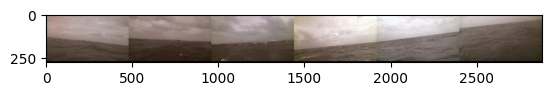

In [86]:
# test the crop_out_the_bottom function on one random image from the images/buoys directory
# get the list of files in the images/buoys directory
files = glob.glob('../images/buoys/*/*')
# get a random file
file = random.choice(files)
# read the image
image = cv2.imread(file)
# crop out the bottom
image = crop_out_the_bottom(image)
# show the image
plt.imshow(image)

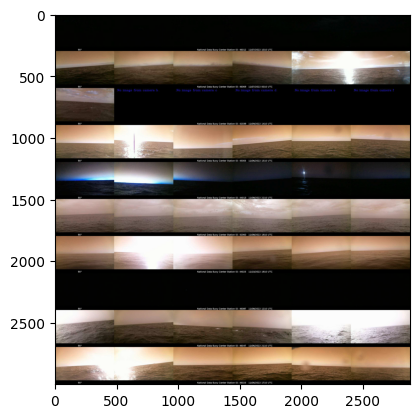

In [108]:
# grab ten random images from the images/buoys directory
ten_randos = random.sample(glob.glob('../images/buoys/*/*'), 10)

# with cv2 put the images in a grid with one column and ten rows and save the image as 'tapestry.png' in the images directory
# get the height and width of the first image
height, width, channels = cv2.imread(ten_randos[0]).shape
# height -= 25 # crop out the bottom 25 pixels
# create a blank image
blank_image = np.zeros((height*10, width, channels), np.uint8)
# for each image
for i in range(len(ten_randos)):
    try:
        # get the image
        image = cv2.imread(ten_randos[i])
        # crop out the bottom
        # image = crop_out_the_bottom(image)
        # add the image to the blank image
        blank_image[i*height:(i+1)*height, 0:width] = image
    except:
        pass
# save the blank image
cv2.imwrite('../images/tapestry.png', blank_image)
# show the blank image
plt.imshow(blank_image)


In [ ]:
# Test out the tapestry weaver function and the get_newest_images function
process_flow()